<img src="Branded_Logo_CUDenver.PNG" width="150">

## <center>CSCI 4580/5580 - Data Science – Spring 2022</center>
<center>Assignment 1: Exploratory Data Analysis and Statistics</center><center><font color='red'>Deadline: March 17, 2022 - 11:59 PM</font></center><center>Total Points: 100</center>

## Instructions
- Please note that this assignment must be done individually. By submitting this lab, you certify that this is your own work, your code will be checked against other submissions and resources using automatic tools. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

## Deliverables
You need to submit a single .ipynb file on Canvas, names your-lastname_your-first-name.ipynb. For example, if your name is John Smith, you should name the file smith_john.ipynb.
- Please do not include extra files such as the input datasets in your submission.
- Answer Questions 1 - 10 in the designated cells. Please do not add or remove any cells. 
- Please download your submission file after submission and make sure it is not corrupted. Use the 'Run All' option from the 'Cell' menu to ensure all cells run without any issues. We will not be responsible for corrupted submissions and will not take a resubmission after the deadline.

## Need Help?
If you need help with this lab, please email me at sundous.hussein@ucdenver.edu or come to my office hours. We also encourage you to ask your questions on the designated channel for the lab on Microsoft Teams. This way, you may receive assistance from your classmates that might’ve ran through the same issues.

# Overview
Exploratory Data Analysis (EDA) is the process of examining and visualizing a novel dataset to understand its characteristics and patterns, before attempting more formal analysis. 

### The Dataset

The dataset for this assignment is the Abalone Dataset. The dataset contains various attributs of abalone and is typically used to predict the age of abalone from physical measurements.

The data directory contains the following 2 files:

<b>abalone.data: </b> CSV file with attributes of 4177 abalones.

<b>abalone.names: </b> Text file containing full description of the dataset.

## Part 1: Reading the Dataset

#### Question 1 [5 Points]

Step 1 is to read the dataset. Look at the first few lines of the file. Notice that most columns are numeric, but the first collumn is string with one of three values (gender). 

In [37]:
import csv
def loaddatafile(fname):
    # Add your code here
    data =[]
    myfile = open(fname)
    reader = csv.reader(myfile)
    for record in reader:
        data.append(record)
    
    return data

'abalone_raw' should be a list of records, and each record should be a list of strings

In [38]:
abalone_raw = loaddatafile("data/abalone.data")
print(abalone_raw)
#print(abalone_raw[0])

[['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15'], ['M', '0.35', '0.265', '0.09', '0.2255', '0.0995', '0.0485', '0.07', '7'], ['F', '0.53', '0.42', '0.135', '0.677', '0.2565', '0.1415', '0.21', '9'], ['M', '0.44', '0.365', '0.125', '0.516', '0.2155', '0.114', '0.155', '10'], ['I', '0.33', '0.255', '0.08', '0.205', '0.0895', '0.0395', '0.055', '7'], ['I', '0.425', '0.3', '0.095', '0.3515', '0.141', '0.0775', '0.12', '8'], ['F', '0.53', '0.415', '0.15', '0.7775', '0.237', '0.1415', '0.33', '20'], ['F', '0.545', '0.425', '0.125', '0.768', '0.294', '0.1495', '0.26', '16'], ['M', '0.475', '0.37', '0.125', '0.5095', '0.2165', '0.1125', '0.165', '9'], ['F', '0.55', '0.44', '0.15', '0.8945', '0.3145', '0.151', '0.32', '19'], ['F', '0.525', '0.38', '0.14', '0.6065', '0.194', '0.1475', '0.21', '14'], ['M', '0.43', '0.35', '0.11', '0.406', '0.1675', '0.081', '0.135', '10'], ['M', '0.49', '0.38', '0.135', '0.5415', '0.2175', '0.095', '0.19', '11'], ['F', '0.535', '0.405',

#### Question 2 [15 Points]
Now construct the variable 'abalone' which is list of list of numbers from abalone_raw by parsing the numeric strings to float values. For the first column, map the string values to numeric ones. 
Create a dictionary 'sex_to_number' and inverse dictionary 'number_to_sex' to map between the string values and numeric values. 

In [39]:
# Convert the string table to a numeric one, and return the dictionaries
def raw_to_data(data): 
    sex_to_numbers = {'F' : 0.0,'I':1.0,'M':2.0}
    numbers_to_sex = {0.0:'F',1.0:'1',2.0:'M'}
    numeric = [[sex_to_numbers[x]
                if x in sex_to_numbers
                else float(x) for x in y ]for y in data]
    return numeric, sex_to_numbers, numbers_to_sex

In [40]:
abalone, sex_to_numbers, numbers_to_sex = raw_to_data(abalone_raw)
print (f'sex to numbers: {sex_to_numbers}')
print (f'numbers to sex: {numbers_to_sex}')
print (f'the first row of the numerical data: {abalone[0]}')

sex to numbers: {'F': 0.0, 'I': 1.0, 'M': 2.0}
numbers to sex: {0.0: 'F', 1.0: '1', 2.0: 'M'}
the first row of the numerical data: [2.0, 0.455, 0.365, 0.095, 0.514, 0.2245, 0.101, 0.15, 15.0]


## Part 2: Basic Statistics

#### Question 3 [5 Points]
Create a list of the column names for this dataset from the dataset description. Preserve the case and the spaces in these names.

In [41]:
col_names = ['Sex','Length','Diameter','Height','Wholeweight','ShuckedWeight','VisceraWeight','ShellWeight','Rings']
col_names

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Wholeweight',
 'ShuckedWeight',
 'VisceraWeight',
 'ShellWeight',
 'Rings']

#### Question 4 [5 Points]
Now create a dictionary 'name_to_index' mapping column name to column.

In [42]:
# Add your code here
name_to_index = dict(zip(col_names,range(len(col_names))))
print(name_to_index)

{'Sex': 0, 'Length': 1, 'Diameter': 2, 'Height': 3, 'Wholeweight': 4, 'ShuckedWeight': 5, 'VisceraWeight': 6, 'ShellWeight': 7, 'Rings': 8}


#### Question 5 [10 Points]
Use name_to_index to define a get_column function which returns a named column from the abalone table.

In [43]:
def get_column(name):
    index = name_to_index.get(name);
    col = []
    for i in abalone:
        col.append(i[index])
    return col

In [44]:
print(get_column('Height'))

[0.095, 0.09, 0.135, 0.125, 0.08, 0.095, 0.15, 0.125, 0.125, 0.15, 0.14, 0.11, 0.135, 0.145, 0.1, 0.13, 0.085, 0.1, 0.08, 0.1, 0.095, 0.1, 0.155, 0.135, 0.165, 0.14, 0.185, 0.14, 0.18, 0.14, 0.165, 0.165, 0.165, 0.175, 0.2, 0.105, 0.155, 0.105, 0.135, 0.09, 0.105, 0.135, 0.045, 0.055, 0.05, 0.095, 0.12, 0.12, 0.07, 0.16, 0.12, 0.095, 0.13, 0.12, 0.1, 0.14, 0.12, 0.135, 0.06, 0.125, 0.105, 0.11, 0.13, 0.095, 0.12, 0.12, 0.16, 0.185, 0.12, 0.07, 0.13, 0.11, 0.17, 0.175, 0.195, 0.15, 0.14, 0.15, 0.14, 0.17, 0.14, 0.175, 0.165, 0.16, 0.14, 0.18, 0.14, 0.16, 0.13, 0.16, 0.135, 0.15, 0.175, 0.165, 0.19, 0.195, 0.15, 0.13, 0.13, 0.125, 0.095, 0.145, 0.16, 0.14, 0.16, 0.155, 0.165, 0.125, 0.135, 0.105, 0.125, 0.105, 0.08, 0.105, 0.125, 0.115, 0.135, 0.105, 0.15, 0.085, 0.105, 0.085, 0.14, 0.075, 0.08, 0.06, 0.09, 0.085, 0.16, 0.165, 0.165, 0.125, 0.09, 0.095, 0.065, 0.115, 0.08, 0.09, 0.11, 0.095, 0.155, 0.145, 0.19, 0.155, 0.13, 0.125, 0.12, 0.08, 0.055, 0.095, 0.145, 0.185, 0.19, 0.16, 0.135

#### Question 6 [10 Points]
use numpy to compute the min, max, average and std deviation of the Height column.

In [45]:
import numpy as np
heights = get_column('Height')
height_stats = [min(heights),max(heights),np.mean(heights),np.std(heights)]
print(f'min: {height_stats[0]}')
print(f'max: {height_stats[1]}')
print(f'average: {height_stats[2]}')
print(f'std: {height_stats[3]}')

min: 0.0
max: 1.13
average: 0.13951639932966242
std: 0.04182204947769995


#### Question 7 [15 Points]
Now create a 9x5 pandas dataframe. Each row of the table should be a column name followed by the values of min, max, mean, and std for that column.

In [46]:
import pandas as pd
import numpy as np
dict_info = dict(zip(col_names,[[] for i in range(len(col_names))]))
for i in col_names:
    column=get_column(i)
    dict_info[i]=[min(column),max(column),np.mean(column),np.std(column)]
summaries = pd.DataFrame.from_dict(data = dict_info,orient = 'index', columns = ['min','max','mean','std'])
    
summaries

,min,max,mean,std
Sex,0.0000,2.0000,1.052909,0.822142
Length,0.0750,0.8150,0.523992,0.120079
Diameter,0.0550,0.6500,0.407881,0.099228
Height,0.0000,1.1300,0.139516,0.041822
Wholeweight,0.0020,2.8255,0.828742,0.490330
ShuckedWeight,0.0010,1.4880,0.359367,0.221936
VisceraWeight,0.0005,0.7600,0.180594,0.109601
ShellWeight,0.0015,1.0050,0.238831,0.139186
Rings,1.0000,29.0000,9.933684,3.223783


## Part 3: Histograms

#### Question 8 [15 Points]
Now create a 3x3 grid of histograms, one for each column. Make sure your figure is large enough (should consume most of the width of the page). We recommend you use matplotlib.pyplot and its 'subplots' function. Include the column name as a title above each subfigure. You must use loops rather than enumerating all 9 column names.

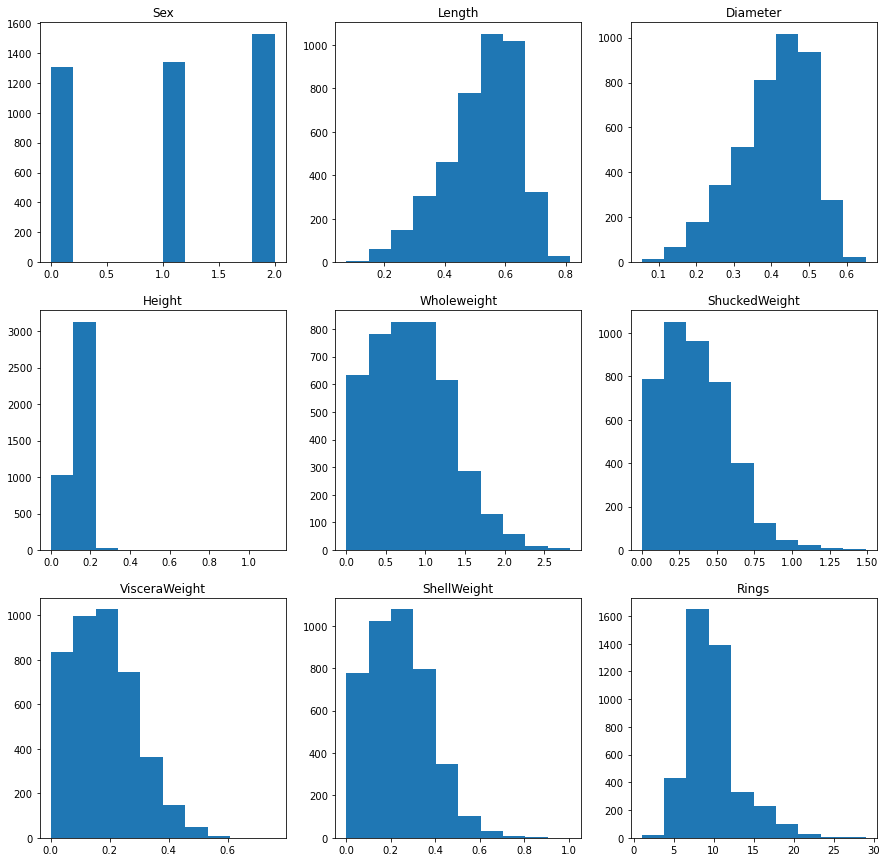

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3,figsize=(15,15))
index =0;
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(col_names[index])
        ax[i][j].hist(get_column(col_names[index]))
        index +=1



plt.show()

## Part 4: Scatter plots

#### Question 9 [15 Points]
Now ceate a grid of scatter plots for each column vs the "Rings" column. Use color to distinguish the sex of the specimen in each plot. Make titles of the form "&lt;colname&gt; vs Rings". Its fine to include "Rings vs Rings" as the last plot. Add regression lines to the scatter plots.

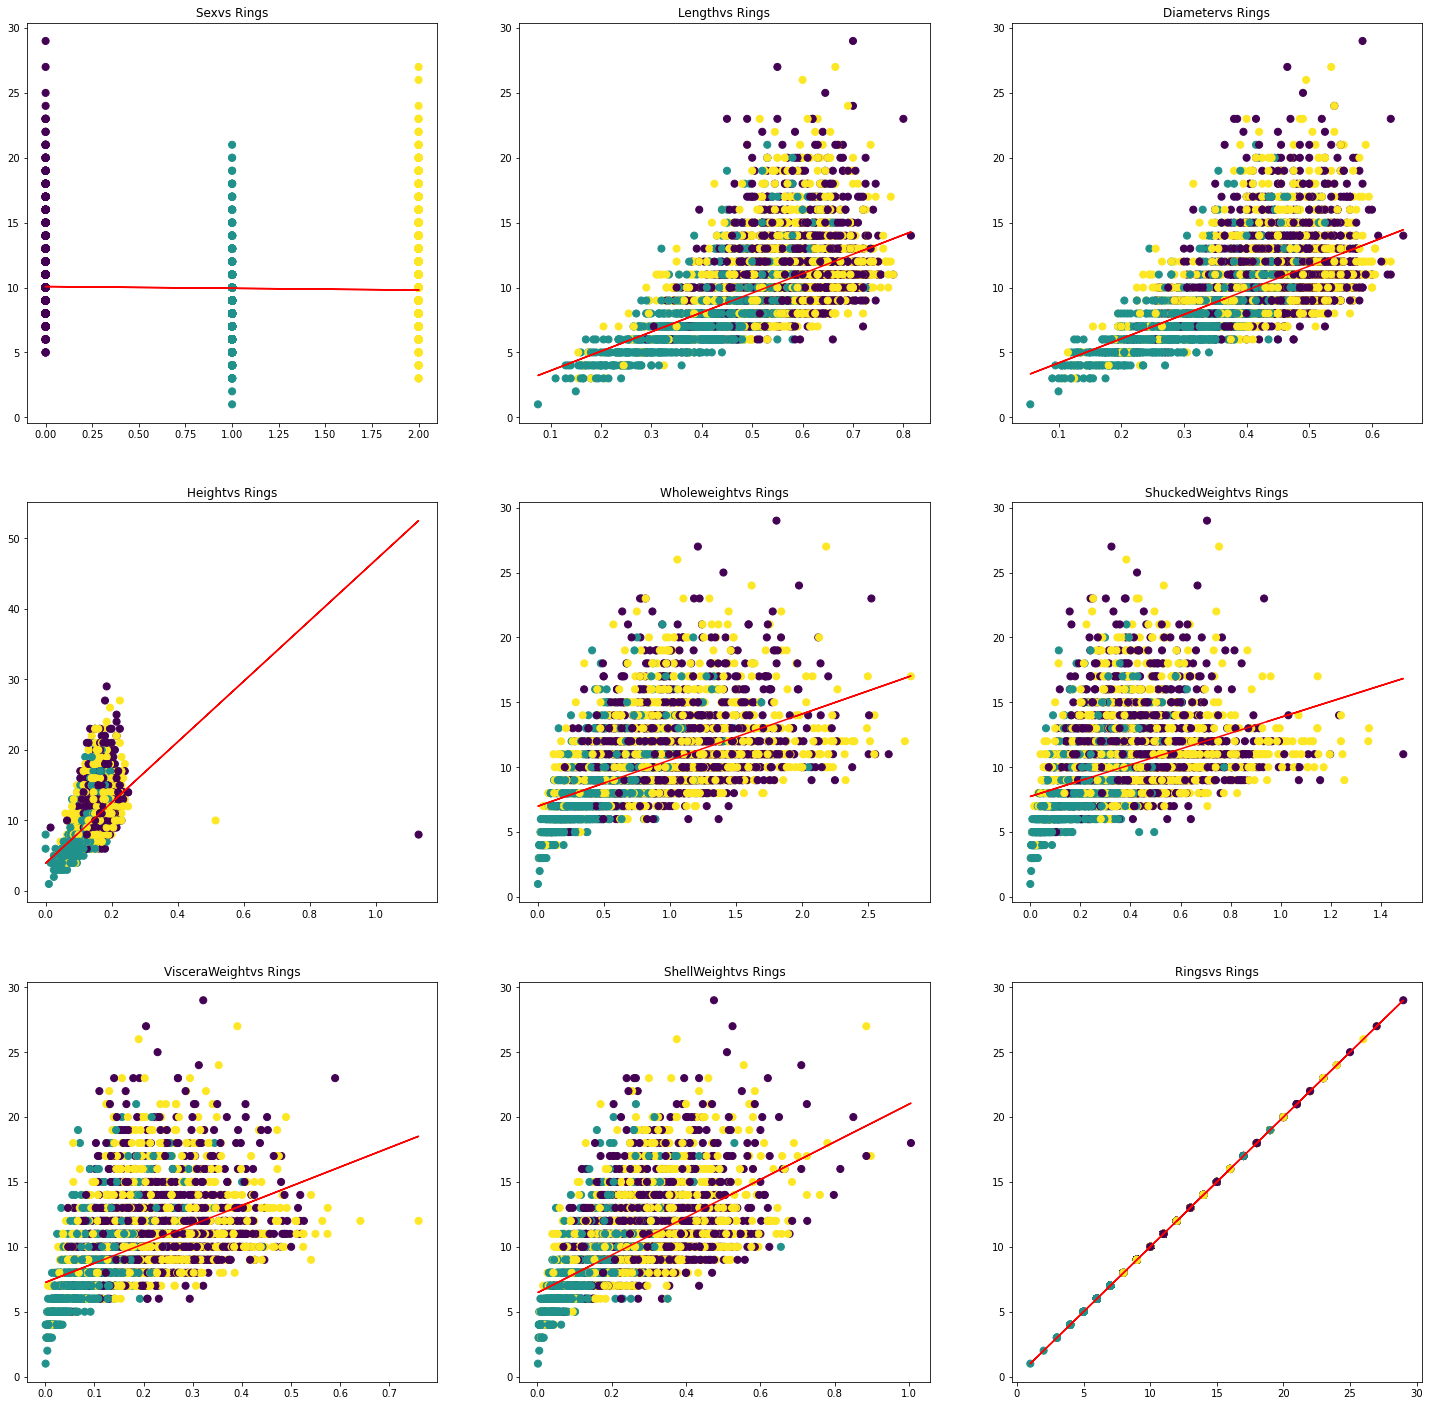

In [48]:
rings = get_column("Rings")
sex = get_column("Sex")
fig, ax = plt.subplots(3, 3,figsize=(25,25))
index =0;
for i in range(3):
    for j in range(3):
        ax[i][j].set_title(col_names[index] + 'vs Rings')
        ax[i][j].scatter(get_column(col_names[index]),rings, c = sex, s = 50)
        m,b = np.polyfit(get_column(col_names[index]),rings,1)
        ax[i][j].plot(get_column(col_names[index]),m*np.array(get_column(col_names[index]))+b,'-',color='red')
        index +=1

plt.show()

#### Question 10 [5 Points]
Do you notice any issues with the dataset? e.g. outliers?
There are outliers in all 8 graphs except the last one . The last one all the data points align and there are no unusual values in the last.The last one is rings vs rings